**Upload the Google Sheet from Google Drive**

 *Authenticate and Connect to Google Drive*

In [1]:
from google.colab import auth
from google.auth import default
import gspread
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Authenticate and create the PyDrive client
auth.authenticate_user()

# Connect to Google Sheets
gc = gspread.authorize(default()[0])

**Load Data from the Google Sheet**

In [2]:
sheet_id = '1XkUdaxzCFHRzj3WiIfplrT-Q9vhtjwFlSh93XuF0la4'
sheet = gc.open_by_key(sheet_id)

# Select the worksheet in the Google Sheet
worksheet = sheet.get_worksheet(0)

# Convert the worksheet to a pandas DataFrame
import pandas as pd
data = pd.DataFrame(worksheet.get_all_records())

**Data Cleaning**

*Overview of the data*

In [3]:
data.head()

,Timestamp,Who is your Trainer?,Please rate your overall experience with the trainer,How satisfied are you with how the trainer took you through the curriculum?,Which curriculum areas would you like the instructor to discuss more thoroughly?,Was the trainer able to mentor and guide you through the entire course?,How would you rate the pace of learning on the course?,Do you appreciate that pace?,"If no, what pace would you prefer?",How engaging was the course instructor?,...,How would you rate the Training Assistant on practical skills competence? [Average],How would you rate the Training Assistant on practical skills competence? [Good],How would you rate the Training Assistant on practical skills competence? [Excellent],How would you rate the Training Assistant on practical skills competence? [None],How would you rate the Training Assistant on readiness to help? [Poor],How would you rate the Training Assistant on readiness to help? [Average],How would you rate the Training Assistant on readiness to help? [Good],How would you rate the Training Assistant on readiness to help? [Excellent],How would you rate the Training Assistant on readiness to help? [None],Any other feedback for us concerning the training assistants?
0,23/04/2024 10:58:26,Jason Chumba,5,5,Theory,5,Medium,Yes,,5,...,,,Sharon,,,,,Joan,,
1,23/04/2024 11:07:46,Molly Atieno,5,5,Practical,5,Medium,Yes,,5,...,,Mwanatumu,,,,,Mwanatumu,,,
2,23/04/2024 11:09:31,Molly Atieno,5,5,Practical,4,Medium,Yes,,5,...,Mwanatumu,,,,,Mwanatumu,,,,
3,23/04/2024 11:13:01,Molly Atieno,5,5,Both practical and theory,5,Medium,Yes,Medium,5,...,,Mwanatumu,,,,,Mwanatumu,,,
4,23/04/2024 11:14:06,Jason Chumba,5,4,Practical,5,Medium,Yes,,4,...,,Joan,,,,,,Joan,,


In [4]:
# Display summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 44 columns):
 #   Column                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                        --------------  ----- 
 0   Timestamp                                                                                                     202 non-null    object
 1   Who is your Trainer?                                                                                          202 non-null    object
 2   Please rate your overall experience with the trainer                                                          202 non-null    int64 
 3   How satisfied are you with how the trainer took you through the curriculum?                                   202 non-null    int64 
 4   Which curriculum areas would you like the instructor to discus

***Training Assistant Communication Rating***

In [5]:
# Create a dictionary to store ratings and corresponding columns
communication_rating_columns = {
    'Poor': 'Rate your training assistant communication [Poor]',
    'Average': 'Rate your training assistant communication [Average]',
    'Good': 'Rate your training assistant communication [Good]',
    'Excellent': 'Rate your training assistant communication [Excellent]',
    'None': 'Rate your training assistant communication [None]'
}

# Create lists to store trainer names and ratings
training_assistant_names = []
communication_ratings = []

# Iterate over rows and extract the rating and trainer name
for index, row in data.iterrows():
    for rating, column_name in communication_rating_columns.items():
        if pd.notna(row[column_name]) and row[column_name] != '':
            training_assistant_names.append(row[column_name])  # Append the trainer name
            communication_ratings.append(rating)  # Append the rating
            break  # Stop checking other columns once a rating is found
    else:
        training_assistant_names.append(None)  # If no rating is found, append None for trainer name
        communication_ratings.append(None)  # If no rating is found, append None for rating

# Create a new DataFrame with trainer names and ratings
communication_ratings = pd.DataFrame({'Training Assitant Name': training_assistant_names, 'Communication Rating': communication_ratings})

# Group by trainer name and rating and count occurrences
communication_counts = communication_ratings.groupby(['Training Assitant Name', 'Communication Rating']).size().reset_index(name='Count')

# Print the results
print(communication_counts)


   Training Assitant Name Communication Rating  Count
0               Christine              Average      2
1               Christine            Excellent     13
2               Christine                 Good      3
3               Christine                 Poor      4
4                 Cynthia              Average      2
5                 Cynthia            Excellent     17
6                 Cynthia                 Good      6
7                    Joan              Average      2
8                    Joan            Excellent     18
9                    Joan                 Good      8
10               Margaret              Average      3
11               Margaret            Excellent     25
12               Margaret                 Good     12
13               Margaret                 Poor      3
14              Mwanatumu              Average      6
15              Mwanatumu            Excellent      2
16              Mwanatumu                 Good      9
17              Mwanatumu   

In [6]:
# Map ratings to numerical values for calculating average
comunication_rating_mapping = {'Poor': 1, 'Average': 2, 'Good': 3, 'Excellent': 4, 'None': 0}
communication_ratings['Communication Rating Value'] = communication_ratings['Communication Rating'].map(comunication_rating_mapping)

# Calculate average rating per trainer
communication_average_ratings = communication_ratings.groupby('Training Assitant Name')['Communication Rating Value'].mean().reset_index(name='Commuication Average Rating')

# Print the results
print(communication_average_ratings)

  Training Assitant Name  Commuication Average Rating
0              Christine                     3.136364
1                Cynthia                     3.600000
2                   Joan                     3.571429
3               Margaret                     3.372093
4              Mwanatumu                     2.578947
5                   None                     0.000000
6                Peninah                     3.111111
7                 Sharon                     3.782609


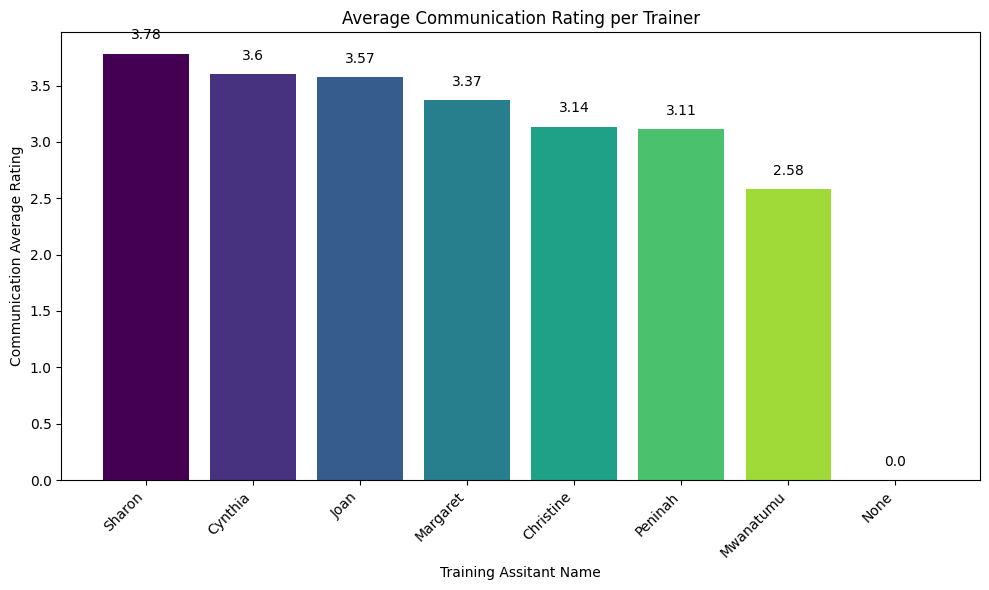

In [7]:
# Sort average_ratings DataFrame by 'Commuication Average Rating' in descending order
communication_average_ratings_sorted = communication_average_ratings.sort_values(by=['Commuication Average Rating'], ascending=False)

# Create a bar plot of average ratings in descending order with color and data labels
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(communication_average_ratings_sorted)))
bars = plt.bar(communication_average_ratings_sorted['Training Assitant Name'], communication_average_ratings_sorted['Commuication Average Rating'], color=colors)
plt.xlabel('Training Assitant Name')
plt.ylabel('Communication Average Rating')
plt.title('Average Communication Rating per Trainer')
plt.xticks(rotation=45, ha='right')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

***Training Assistant Professionalism Rating***

In [8]:
# Create a dictionary to store ratings and corresponding columns
rating_columns = {
    'Poor': 'How would you rate the Training Assistant on professionalism? [Poor]',
    'Average': 'How would you rate the Training Assistant on professionalism? [Average]',
    'Good': 'How would you rate the Training Assistant on professionalism? [Good ]',
    'Excellent': 'How would you rate the Training Assistant on professionalism? [Excellent]',
    'None': 'How would you rate the Training Assistant on professionalism? [None]'
}

# Create lists to store trainer names and ratings
trainer_names = []
ratings = []

# Iterate over rows and extract the rating and trainer name
for index, row in data.iterrows():
    for rating, column_name in rating_columns.items():
        if pd.notna(row[column_name]) and row[column_name] != '':
            trainer_names.append(row[column_name])  # Append the trainer name
            ratings.append(rating)  # Append the rating
            break  # Stop checking other columns once a rating is found
    else:
        trainer_names.append(None)  # If no rating is found, append None for trainer name
        ratings.append(None)  # If no rating is found, append None for rating

# Create a new DataFrame with trainer names and ratings
professionalism_ratings = pd.DataFrame({'Trainer Name': trainer_names, 'Professionalism Rating': ratings})

# Group by trainer name and rating and count occurrences
professionalism_counts = professionalism_ratings.groupby(['Trainer Name', 'Professionalism Rating']).size().reset_index(name='Count')

# Print the results
print(professionalism_counts)


       Trainer Name Professionalism Rating  Count
0         Christine                Average      2
1         Christine              Excellent     13
2         Christine                   Good      6
3         Christine                   Poor      4
4      Cynthia Pesi              Excellent     19
5      Cynthia Pesi                   Good      7
6      Cynthia Pesi                   Poor      1
7              Joan                Average      1
8              Joan              Excellent     20
9              Joan                   Good      8
10             Joan                   Poor      1
11  Margaret Wangui                Average      5
12  Margaret Wangui              Excellent     26
13  Margaret Wangui                   Good     11
14  Margaret Wangui                   Poor      2
15        Mwanatumu                Average     10
16        Mwanatumu              Excellent      1
17        Mwanatumu                   Good      7
18        Mwanatumu                   Poor      1


In [9]:
# Map ratings to numerical values for calculating average
rating_mapping = {'Poor': 1, 'Average': 2, 'Good': 3, 'Excellent': 4, 'None': 0}
professionalism_ratings['Rating Value'] = professionalism_ratings['Professionalism Rating'].map(rating_mapping)

# Calculate average rating per trainer
average_ratings = professionalism_ratings.groupby('Trainer Name')['Rating Value'].mean().reset_index(name='Average Rating')

# Print the results
print(average_ratings)

      Trainer Name  Average Rating
0        Christine        3.120000
1     Cynthia Pesi        3.629630
2             Joan        3.566667
3  Margaret Wangui        3.386364
4        Mwanatumu        2.421053
5             None        0.000000
6          Peninah        3.083333
7           Sharon        3.772727


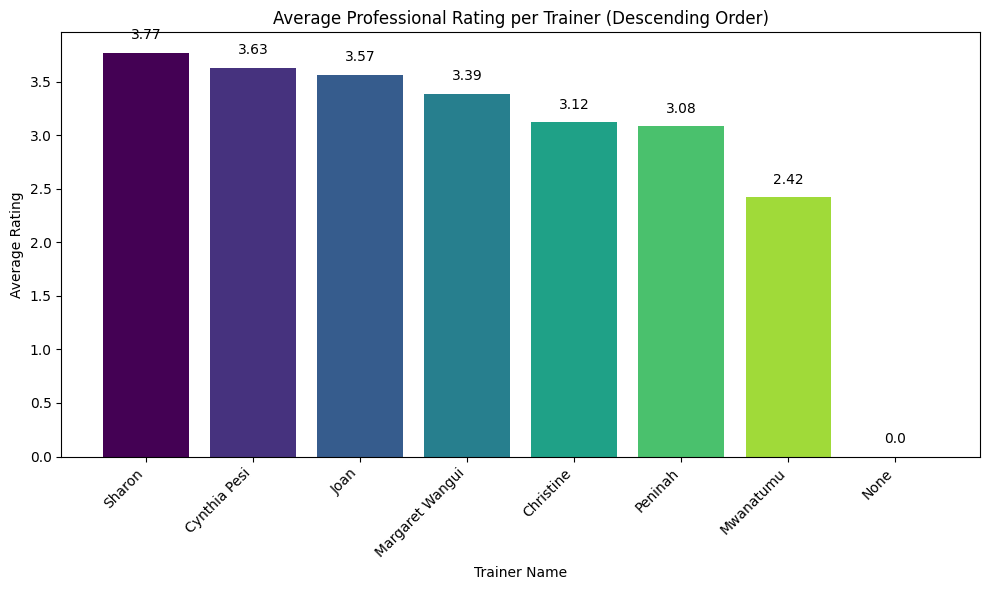

In [10]:
# Sort average_ratings DataFrame by 'Average Rating' in descending order
average_ratings_sorted = average_ratings.sort_values(by=['Average Rating'], ascending=False)

# Create a bar plot of average ratings in descending order with color and data labels
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(average_ratings_sorted)))
bars = plt.bar(average_ratings_sorted['Trainer Name'], average_ratings_sorted['Average Rating'], color=colors)
plt.xlabel('Trainer Name')
plt.ylabel('Average Rating')
plt.title('Average Professional Rating per Trainer (Descending Order)')
plt.xticks(rotation=45, ha='right')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

***Training Assistant Communication skills competence Rating***

In [11]:
# Create a dictionary to store ratings and corresponding columns
communication_skills_rating_columns = {
    'Poor': 'How would you rate the Training Assistant on communication skills? [Poor ]',
    'Average': 'How would you rate the Training Assistant on communication skills? [Average]',
    'Good': 'How would you rate the Training Assistant on communication skills? [Good]',
    'Excellent': 'How would you rate the Training Assistant on communication skills? [Excellent]',
    'None': 'How would you rate the Training Assistant on communication skills? [None]'
}

# Create lists to store trainer names and ratings
trainers_names = []
communication_skills_ratings = []

# Iterate over rows and extract the rating and trainer name
for index, row in data.iterrows():
    for rating, column_name in communication_skills_rating_columns.items(): # Use communication_skills_rating_columns instead of rating_columns
        if pd.notna(row[column_name]) and row[column_name] != '':
            trainers_names.append(row[column_name])  # Append the trainer name
            communication_skills_ratings.append(rating)  # Append the communication skill rating to the correct list
            break  # Stop checking other columns once a rating is found
    else:
        trainers_names.append(None)  # If no rating is found, append None for trainer name
        communication_skills_ratings.append(None)  # If no rating is found, append None for rating

# Create a new DataFrame with trainer names and ratings
communication_skills_ratings = pd.DataFrame({'Trainers Name': trainers_names, 'Communication Skills Rating': communication_skills_ratings})

# Group by trainer name and rating and count occurrences
communications_counts = communication_skills_ratings.groupby(['Trainers Name', 'Communication Skills Rating']).size().reset_index(name='Count')

# Print the results
print(communications_counts)

      Trainers Name Communication Skills Rating  Count
0         Christine                     Average      2
1         Christine                   Excellent     11
2         Christine                        Good      8
3         Christine                        Poor      3
4      Cynthia Pesi                     Average      3
5      Cynthia Pesi                   Excellent     16
6      Cynthia Pesi                        Good      3
7              Joan                   Excellent     21
8              Joan                        Good      9
9   Margaret Wangui                     Average      3
10  Margaret Wangui                   Excellent     25
11  Margaret Wangui                        Good     14
12  Margaret Wangui                        Poor      3
13        Mwanatumu                     Average      5
14        Mwanatumu                   Excellent      2
15        Mwanatumu                        Good     10
16        Mwanatumu                        Poor      3
17        

In [12]:
# Map ratings to numerical values for calculating average
communication_skills_rating_mapping = {'Poor': 1, 'Average': 2, 'Good': 3, 'Excellent': 4, 'None': 0}
communication_skills_ratings['Skills Rating Value'] = communication_skills_ratings['Communication Skills Rating'].map(communication_skills_rating_mapping)
# Use communication_skills_rating_mapping to ensure the correct mapping is applied.


# Calculate average rating per trainer
# Changed 'trainers Name' and 'Skills Rating Value' to match existing column names and dataframes
average_communication_skills_ratings = communication_skills_ratings.groupby('Trainers Name')['Skills Rating Value'].mean().reset_index(name='Skills Average Rating')


# Print the results
print(average_communication_skills_ratings)

     Trainers Name  Skills Average Rating
0        Christine               3.125000
1     Cynthia Pesi               3.590909
2             Joan               3.700000
3  Margaret Wangui               3.355556
4        Mwanatumu               2.550000
5             None               0.000000
6          Peninah               2.882353
7           Sharon               3.826087


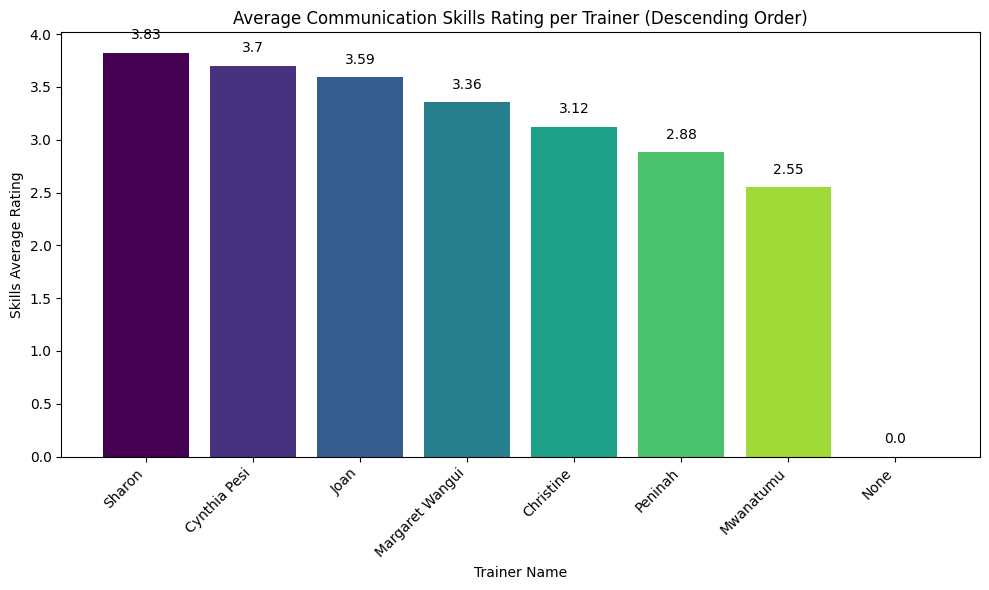

In [13]:
# Sort average_ratings DataFrame by 'Average Rating' in descending order
average_skills_ratings_sorted = average_communication_skills_ratings.sort_values(by=['Skills Average Rating'], ascending=False)

# Create a bar plot of average ratings in descending order with color and data labels
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(average_skills_ratings_sorted)))
bars = plt.bar(average_ratings_sorted['Trainer Name'], average_skills_ratings_sorted['Skills Average Rating'], color=colors)
plt.xlabel('Trainer Name')
plt.ylabel('Skills Average Rating')
plt.title('Average Communication Skills Rating per Trainer (Descending Order)')
plt.xticks(rotation=45, ha='right')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

***Training Assistant Practical skills competence Rating***

In [14]:
# Create a dictionary to store ratings and corresponding columns
practical_skills_rating_columns = {
    'Poor': 'How would you rate the Training Assistant on practical skills competence? [Poor]',
    'Average': 'How would you rate the Training Assistant on practical skills competence? [Average]',
    'Good': 'How would you rate the Training Assistant on practical skills competence? [Good]',
    'Excellent': 'How would you rate the Training Assistant on practical skills competence? [Excellent]',
    'None': 'How would you rate the Training Assistant on practical skills competence? [None]'
}

# Create lists to store trainer names and ratings
practical_trainer_names = []
practical_skills_ratings = []

# Iterate over rows and extract the rating and trainer name
for index, row in data.iterrows():
    for rating, column_name in practical_skills_rating_columns.items():
        if pd.notna(row[column_name]) and row[column_name] != '':
            practical_trainer_names.append(row[column_name])  # Append the trainer name
            practical_skills_ratings.append(rating)
            break  # Stop checking other columns once a rating is found
    else:
        practical_trainer_names.append(None)  # If no rating is found, append None for trainer name
        practical_skills_ratings.append(None)  # If no rating is found, append None for rating

# Create a new DataFrame with trainer names and ratings
practical_skills_rating = pd.DataFrame({'TA Name': practical_trainer_names, 'Practical Skills Rating': practical_skills_ratings})

# Group by trainer name and rating and count occurrences
practical_counts = practical_skills_rating.groupby(['TA Name', 'Practical Skills Rating']).size().reset_index(name='Count')

# Print the results
print(practical_counts)

            TA Name Practical Skills Rating  Count
0         Christine                 Average      2
1         Christine               Excellent     13
2         Christine                    Good      7
3         Christine                    Poor      4
4      Cynthia Pesi                 Average      2
5      Cynthia Pesi               Excellent     14
6      Cynthia Pesi                    Good      7
7      Cynthia Pesi                    Poor      1
8              Joan                 Average      1
9              Joan               Excellent     16
10             Joan                    Good      7
11  Margaret Wangui                 Average      5
12  Margaret Wangui               Excellent     25
13  Margaret Wangui                    Good     11
14        Mwanatumu                 Average     10
15        Mwanatumu               Excellent      3
16        Mwanatumu                    Good      8
17             None                    None      2
18          Peninah            

In [15]:
# Map ratings to numerical values for calculating average
practical_skills_rating_mapping = {'Poor': 1, 'Average': 2, 'Good': 3, 'Excellent': 4, 'None': 0}
# Use the DataFrame practical_skills_rating instead of the list practical_skills_ratings
practical_skills_rating['Practicals Rating Value'] = practical_skills_rating['Practical Skills Rating'].map(practical_skills_rating_mapping)

# Calculate average rating per trainer
# Changed 'trainers Name' and 'Skills Rating Value' to match existing column names and dataframes
average_practical_skills_ratings = practical_skills_rating.groupby('TA Name')['Practicals Rating Value'].mean().reset_index(name='Practical Average Rating')


# Print the results
print(average_practical_skills_ratings)

           TA Name  Practical Average Rating
0        Christine                  3.115385
1     Cynthia Pesi                  3.416667
2             Joan                  3.625000
3  Margaret Wangui                  3.487805
4        Mwanatumu                  2.666667
5             None                  0.000000
6          Peninah                  2.941176
7           Sharon                  3.821429


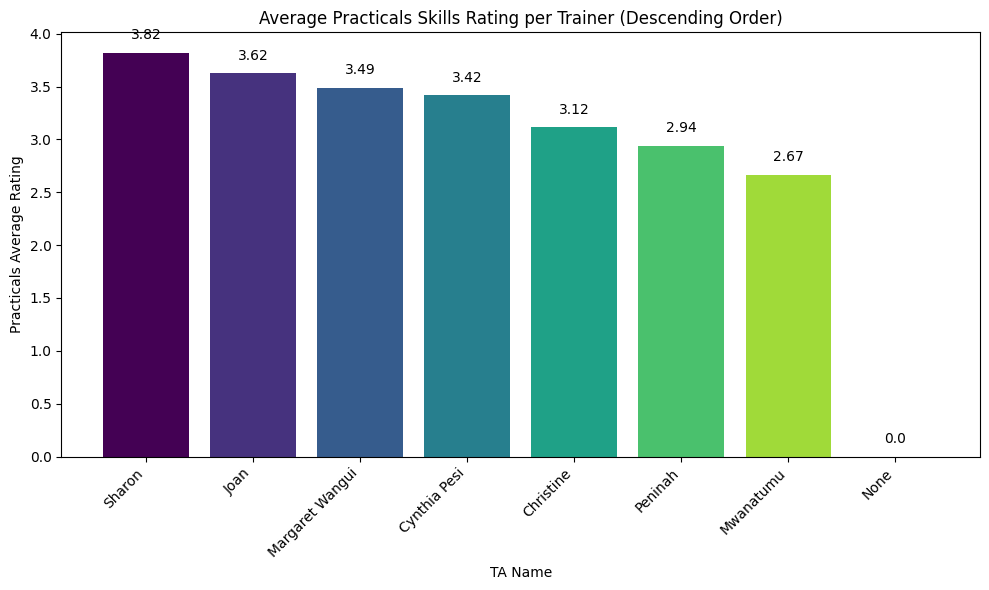

In [16]:
# Sort average_ratings DataFrame by 'Practical Average Rating' in descending order
average_practicals_ratings_sorted = average_practical_skills_ratings.sort_values(by=['Practical Average Rating'], ascending=False) #column name was incorrect - change 'Practicals Average Rating' to 'Practical Average Rating'

# Create a bar plot of average ratings in descending order with color and data labels
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(average_practicals_ratings_sorted)))
bars = plt.bar(average_practicals_ratings_sorted['TA Name'], average_practicals_ratings_sorted['Practical Average Rating'], color=colors)
plt.xlabel('TA Name')
plt.ylabel('Practicals Average Rating')
plt.title('Average Practicals Skills Rating per Trainer (Descending Order)')
plt.xticks(rotation=45, ha='right')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

***Training Assistant Readiness to Help Rating***

In [17]:
# Create a dictionary to store ratings and corresponding columns
readiness_rating_columns = {
    'Poor': 'How would you rate the Training Assistant on readiness to help? [Poor]',
    'Average': 'How would you rate the Training Assistant on readiness to help? [Average]',
    'Good': 'How would you rate the Training Assistant on readiness to help? [Good]',
    'Excellent': 'How would you rate the Training Assistant on readiness to help? [Excellent]',
    'None': 'How would you rate the Training Assistant on readiness to help? [None]'
}

# Create lists to store trainer names and ratings
readiness_trainer_names = []
readiness_ratings = []

# Iterate over rows and extract the rating and trainer name
for index, row in data.iterrows():
    for rating, column_name in readiness_rating_columns.items():
        if pd.notna(row[column_name]) and row[column_name] != '':
            readiness_trainer_names.append(row[column_name])  # Append the trainer name
            readiness_ratings.append(rating)
            break  # Stop checking other columns once a rating is found
    else:
        readiness_trainer_names.append(None)  # If no rating is found, append None for trainer name
        readiness_ratings.append(None)  # If no rating is found, append None for rating

# Create a new DataFrame with trainer names and ratings
readiness_rating = pd.DataFrame({'Trainer Name': readiness_trainer_names, 'Readiness Rating': readiness_ratings})

# Group by trainer name and rating and count occurrences
readiness_counts = readiness_rating.groupby(['Trainer Name', 'Readiness Rating']).size().reset_index(name='Count')

# Print the results
print(readiness_counts)

       Trainer Name Readiness Rating  Count
0         Christine          Average      2
1         Christine        Excellent     17
2         Christine             Good      6
3         Christine             Poor      3
4      Cynthia Pesi          Average      3
5      Cynthia Pesi        Excellent     16
6      Cynthia Pesi             Good      2
7      Cynthia Pesi             Poor      1
8              Joan        Excellent     25
9              Joan             Good     10
10             Joan             Poor      1
11  Margaret Wangui          Average      3
12  Margaret Wangui        Excellent     23
13  Margaret Wangui             Good     14
14  Margaret Wangui             Poor      1
15        Mwanatumu          Average      9
16        Mwanatumu        Excellent      4
17        Mwanatumu             Good      6
18        Mwanatumu             Poor      4
19             None             None      3
20          Peninah        Excellent     11
21          Peninah             

In [18]:
# Map ratings to numerical values for calculating average
readiness_mapping = {'Poor': 1, 'Average': 2, 'Good': 3, 'Excellent': 4, 'None': 0}

readiness_rating['Readiness Rating Value'] = readiness_rating['Readiness Rating'].map(readiness_mapping)

# Calculate average rating per trainer
# Changed 'trainers Name' and 'Skills Rating Value' to match existing column names and dataframes
average_readiness_ratings = readiness_rating.groupby('Trainer Name')['Readiness Rating Value'].mean().reset_index(name='Readiness Average Rating')

# Print the results
print(average_readiness_ratings)

      Trainer Name  Readiness Average Rating
0        Christine                  3.321429
1     Cynthia Pesi                  3.500000
2             Joan                  3.638889
3  Margaret Wangui                  3.439024
4        Mwanatumu                  2.434783
5             None                  0.000000
6          Peninah                  3.333333
7           Sharon                  3.888889


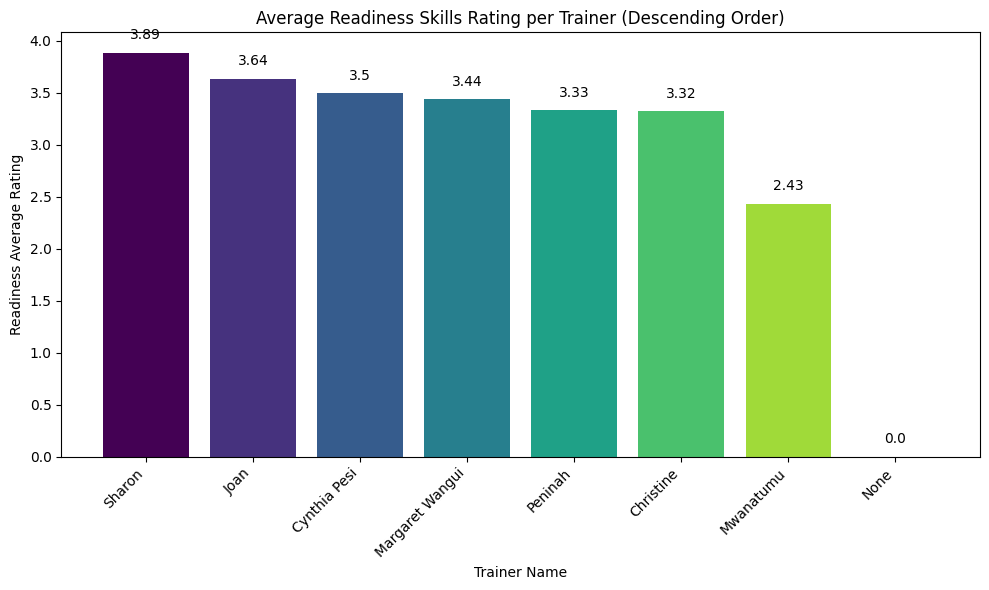

In [19]:
# Sort average_ratings DataFrame by 'Readiness Average Rating' in descending order
average_readiness_ratings_sorted = average_readiness_ratings.sort_values(by=['Readiness Average Rating'], ascending=False)

# Create a bar plot of average ratings in descending order with color and data labels
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(average_readiness_ratings_sorted)))
bars = plt.bar(average_readiness_ratings_sorted['Trainer Name'], average_readiness_ratings_sorted['Readiness Average Rating'], color=colors)
plt.xlabel('Trainer Name')
plt.ylabel('Readiness Average Rating')
plt.title('Average Readiness Skills Rating per Trainer (Descending Order)')
plt.xticks(rotation=45, ha='right')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()